In [379]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [380]:
#Read in population and police CSV's
police_df = pd.read_csv("PoliceF_2.csv")
totalpop_df = pd.read_csv("TotalPop.csv")
yearlychange = pd.read_csv("Yearly.csv")
fatalitychange = pd.read_csv("Fatality_Rate_of_Change_by_Year.csv")
police_df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [381]:
#Insert Year and Month Column
police_df = police_df.reindex(columns = ['UID', 'Name', 'Age', 'Gender', 'Race', 'Date', 'Year', 'Month', 'City', 'State', 'Manner_of_death', 'Armed', 'Mental_illness', 'Flee']) 

#Remove NaN from DataFrame Columns
police_df = police_df.replace(np.nan, 'unknown', regex=True)

#Add Year to Year Column and Month to Month Column
police_df['Date'] = pd.to_datetime(police_df['Date'])
police_df['Year'], police_df['Month'] = police_df['Date'].dt.year, police_df['Date'].dt.month_name()
police_df.head()

,UID,Name,Age,Gender,Race,Date,Year,Month,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44,Female,Asian,2000-05-04,2000,May,Alameda,CA,Shot,unknown,False,False
1,169,Chyraphone Komvongsa,26,Male,Asian,2000-06-02,2000,June,Fresno,CA,Shot,unknown,False,False
2,257,Ming Chinh Ly,36,Male,Asian,2000-08-13,2000,August,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29,Male,Asian,2001-02-09,2001,February,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25,Male,Asian,2001-06-10,2001,June,Riverside,CA,Shot,Knife,False,False


In [382]:
#Export new dataframe to CSV
police_df.to_csv("Police_Fatalities_New.csv")

In [383]:
#Value Count of Fatalities Per State 
state_frequency_df = police_df["State"].value_counts().reset_index().rename(columns={'index': 'State', "State": 'Fatalities'})
state_frequency_df = state_frequency_df.sort_values('Fatalities',ascending=True)
state_frequency_df.head()

,State,Fatalities
50,ND,13
49,RI,20
48,VT,21
47,HI,22
46,NH,29


In [384]:
#Summary Stats of State Frequency
state_frequency_df['Fatalities'].describe()

count      51.000000
mean      244.921569
std       440.630360
min        13.000000
25%        60.500000
50%       128.000000
75%       258.500000
max      2913.000000
Name: Fatalities, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

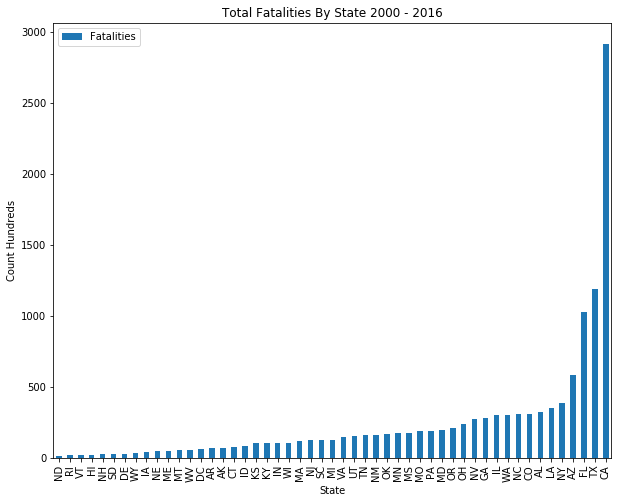

In [385]:
#Bar Graph for Fatalities Per State 
state_frequency_df.plot.bar(x= 'State', y = 'Fatalities')
plt.rcParams['figure.figsize'] = (10,6)
plt.ylabel('Count Hundreds')
plt.title('Total Fatalities By State 2000 - 2016')
plt.show

In [386]:
#Month Frequency
month_frequency_df = police_df["Month"].value_counts().reset_index().rename(columns={'index': 'Month', "Month": 'Fatalities'})
month_frequency_df["Month Number"] = (3, 7, 1, 4, 8, 5, 6, 2, 10, 9, 11, 12)
month_frequency_2 = month_frequency_df.sort_values('Month Number',ascending=True)
month_frequency_2.head()

,Month,Fatalities,Month Number
2,January,1098,1
7,February,1036,2
0,March,1167,3
3,April,1097,4
5,May,1061,5


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

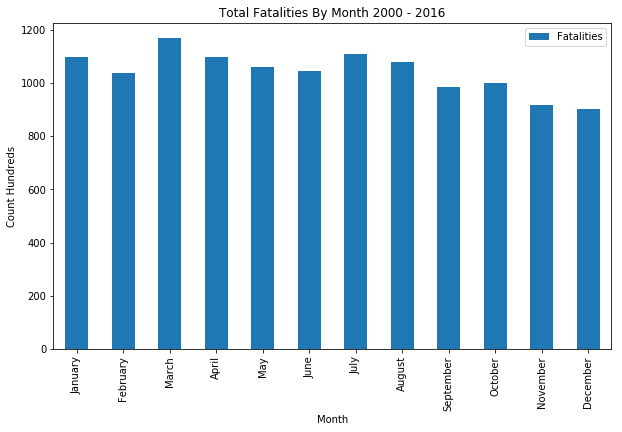

In [387]:
#Bar Graph for State Fatalities
month_frequency_2.plot.bar(x= 'Month', y = 'Fatalities')
plt.rcParams['figure.figsize'] = (10,6)
plt.ylabel('Count Hundreds')
plt.title('Total Fatalities By Month 2000 - 2016')
plt.bar

In [388]:
#State Frequency
mannerofdeath_df = police_df["Manner_of_death"].value_counts().reset_index().rename(columns={'index': 'Manner Of Death', "Manner_of_death": 'Fatalities'})
mannerofdeath_df = mannerofdeath_df.sort_values('Fatalities',ascending=True)
mannerofdeath_df

,Manner Of Death,Fatalities
3,Other,29
2,Shot and Tasered,120
1,Tasered,542
0,Shot,11800


<function matplotlib.pyplot.show(*args, **kw)>

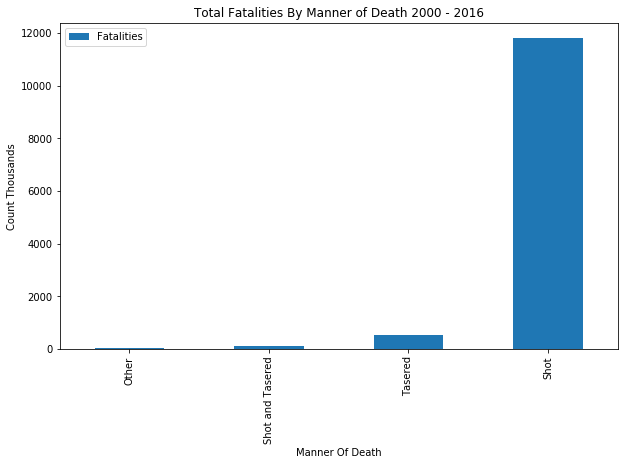

In [389]:
#Bar Graph for Causes of Death
mannerofdeath_df.plot.bar(x= 'Manner Of Death', y = 'Fatalities')
plt.ylabel('Fatalities')
plt.title('Total Fatalities By Manner of Death 2000 - 2016')
plt.ylabel('Count Thousands')
plt.show

In [390]:
#Count of Fatalities Per Year and sort Years
yearcount_df = police_df["Year"].value_counts().reset_index().rename(columns={'index': 'Year', "Year": 'Count'})
yearcount_df = yearcount_df.sort_values('Year',ascending=True)
yearcount_df.head()

,Year,Count
16,2000,316
15,2001,354
14,2002,405
13,2003,436
12,2004,483


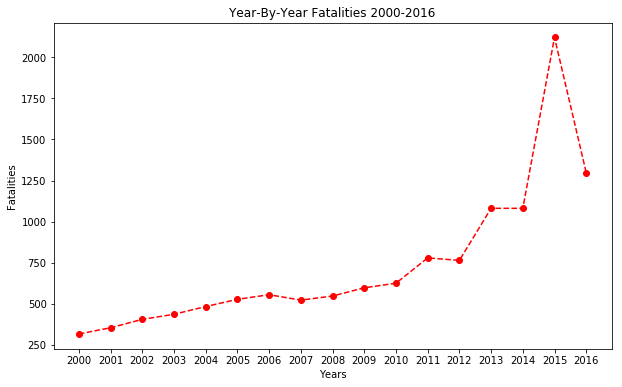

In [391]:
#Count of Fatalities Per Year
plt.plot(yearcount_df.Year, yearcount_df.Count, linestyle='--', marker='o', color="r")
plt.rcParams['figure.figsize'] = (10,5)
plt.title("Year-By-Year Fatalities 2000-2016")
plt.ylabel('Fatalities')
plt.xlabel('Years')
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
plt.show()

In [392]:
#Change Year to dataframe to ascending and remove whitespace from columns
totalpop_df
totalpop_df = totalpop_df.sort_values('Year',ascending=True)
totalpop_df.columns = totalpop_df.columns.str.replace(' ', '')
totalpop_df.head()

,Year,Population,Yearly%Change,YearlyChange,
16,2000,282171957,3.48,981144.0,NaN
15,2001,285081556,1.03,2909599.0,NaN
14,2002,287803914,0.95,2722358.0,NaN
13,2003,290326418,0.88,2522504.0,NaN
12,2004,293045739,0.94,2719321.0,NaN


In [393]:
#Confirmation that the white space was removed from the columns
print (totalpop_df.columns)

Index(['Year', 'Population', 'Yearly%Change', 'YearlyChange', ''], dtype='object')


([<matplotlib.axis.XTick at 0x25f5e292cf8>,
 <a list of 17 Text xticklabel objects>)

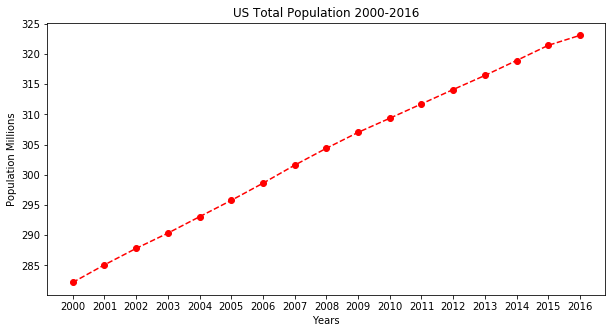

In [394]:
#Count of Fatalities Per Year
plt.plot(totalpop_df.Year, totalpop_df.Population / 10**6, linestyle='--', marker='o', color="r")
plt.rcParams['figure.figsize'] = (10,8)
plt.title("US Total Population 2000-2016")
plt.ylabel("Population Millions")
plt.xlabel("Years")
# plt.xlim(1999,2016)
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [395]:
#Gender
gender_df = police_df["Gender"].value_counts().reset_index().rename(columns={'index': 'Gender', "Gender": 'Count'})
gender_df.head()

,Gender,Count
0,Male,11870
1,Female,613
2,unknown,8


In [396]:
# Labels for the sections of our pie chart
labels = ["Male", "Female", "Unknown"]

# Pie Chart Values
sizes = [11870, 613, 8]

# The colors of each section of the pie chart
colors = ["#66b3ff", "#ff9999", "#99ff99"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, .2, .2)

(-1.1054743649417957,
 1.1082436845106876,
 -1.1037349685911717,
 1.1062732068287757)

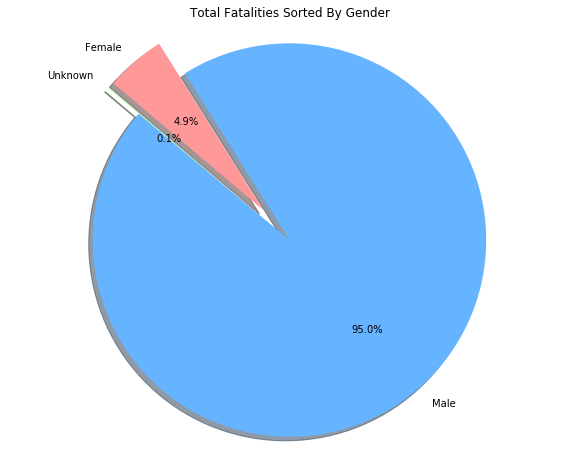

In [397]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fatalities Sorted By Gender")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [398]:
testagegroup_df = police_df[['Age']].replace(regex='unknown', value=-1)
testagegroup_df.head()

,Age
0,44.0
1,26.0
2,36.0
3,29.0
4,25.0


In [399]:
# Create the bins in which Age Data will be held 
# Bins are 0, 25, 50, 75, 100, 101.   
bins = [-10,0, 25, 50, 75, 100, 101]

# Create the names for the four bins
group_names = ["Unknown","1-25", "26-50", "51-75", "76-100", "100+"]

In [400]:
#Group Ages in Age Groups
testagegroup_df["Age Group"] = pd.cut(testagegroup_df["Age"], bins, labels=group_names)
testagegroup_df.head()

,Age,Age Group
0,44.0,26-50
1,26.0,26-50
2,36.0,26-50
3,29.0,26-50
4,25.0,1-25


In [401]:
#Count of each Age Group
countagegroup_df = testagegroup_df[["Age Group"]]
countagegroup_2 = countagegroup_df["Age Group"].value_counts().reset_index().rename(columns={'index': 'Gender', "Gender": 'Count'})
countagegroup_2

,Gender,Age Group
0,26-50,7360
1,1-25,3254
2,51-75,1559
3,Unknown,233
4,76-100,84
5,100+,0


In [402]:
# Labels for the sections of our pie chart
labels = ["26-50", "1-25", "51-75", "Unknown", "76-100"]

# Pie Chart Values
sizes = [7360, 3254, 1559, 233, 84]

# # The colors of each section of the pie chart
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99', '#d7dd1a']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0)

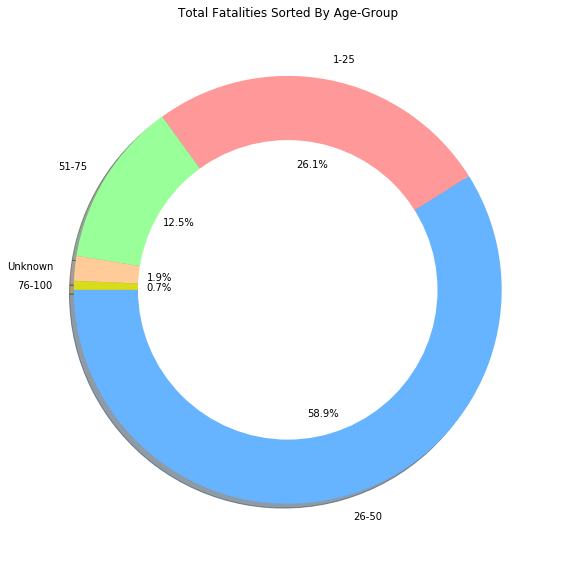

In [403]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
#Plt Title
plt.title("Total Fatalities Sorted By Age-Group")
# Create Donut Graph
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle  
plt.tight_layout()
plt.show()

In [404]:
# Labels for the sections of our pie chart
labels = ["Mental Illness", "No Mental Illness"]

# Pie Chart Values
sizes = [2629, 9862]

# The colors of each section of the pie chart
colors = ['#ff9999','#66b3ff']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

(-1.1830414403733283,
 1.1075286252605556,
 -1.1323554672046223,
 1.1035497368568348)

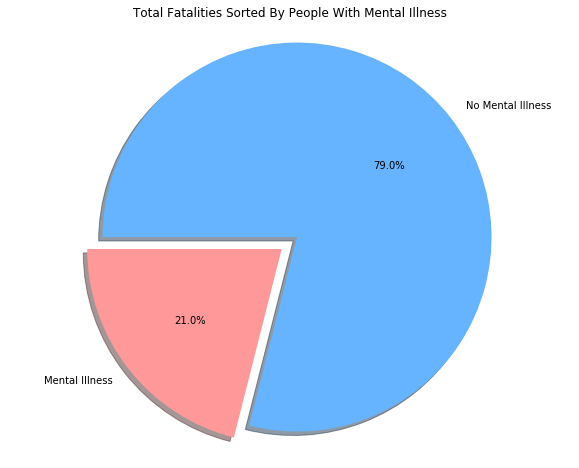

In [405]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
#Plt Title
plt.title("Total Fatalities Sorted By People With Mental Illness")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [406]:
# yearlychange = pd.read_csv("Yearly.csv")
# fatalitychange = pd.read_csv("Fatality_Rate_of_Change_by_Year.csv")
# yearlychange.head()

([<matplotlib.axis.XTick at 0x25f61600fd0>,
 <a list of 17 Text xticklabel objects>)

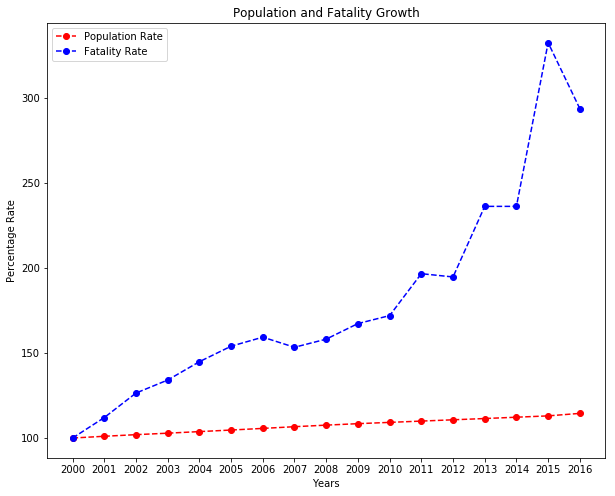

In [409]:
#Count of Fatalities Per Year
plt.plot(yearlychange.Year, yearlychange["Population Rate"], linestyle='--', marker='o', color="r")
plt.plot(fatalitychange.Year, fatalitychange["Fatality Rate"], linestyle='--', marker='o', color="b")
plt.rcParams['figure.figsize'] = (10,8)
plt.title("Population and Fatality Growth")
plt.ylabel("Percentage Rate")
plt.xlabel("Years")
plt.legend()
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])